# 作業目標:
    
    了解數學式與利用超參數調整求導梯度下降的過程

# 作業重點:

(1) dfunc 是 func 偏微分的公式，$X^2$ 偏微分等於 $2X$，可以同時改變 func、dfunc 內容

(2) 調整其它 Hyperparameters: w_init、epochs、lr、decay、momentom 測試逼近的過程

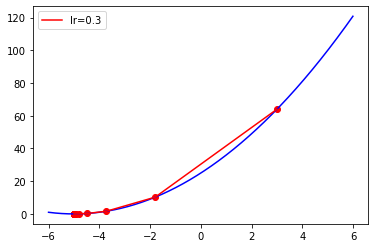

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數: y=(x+5)^2

# 目標函數一階導數: dy/dx=2*(x+5)

def func(x):
    return (x + 5) ** 2

def dfunc(x):
    return 2 * (x + 5)

def GD(w_init, df, epochs, lr):    
    """
    梯度下降法。給定起始點與目標函數的一階導函數，求在 epochs 次反覆運算中 x 的更新值
        :param w_init: w的 init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x 在每次反覆運算後的位置   
    """    
    xs = np.zeros(epochs+1) # 把 "epochs+1" 轉成 dtype=np.float32    
    x = w_init    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示 x 要跨出的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# 起始權重
w_init = 3    
# 執行週期數
epochs = 20 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(w_init, dfunc, epochs, lr=lr)

# 劃出曲線圖
color = 'r'    

t = np.arange(-6.0, 6.0, 0.01)
plt.figure()
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color)    
plt.legend()

plt.show()

# 學習率對梯度下降法的影響 
學習率較小時，收斂到正確結果的速度較慢。
學習率較大時，容易在搜索過程中發生震盪。

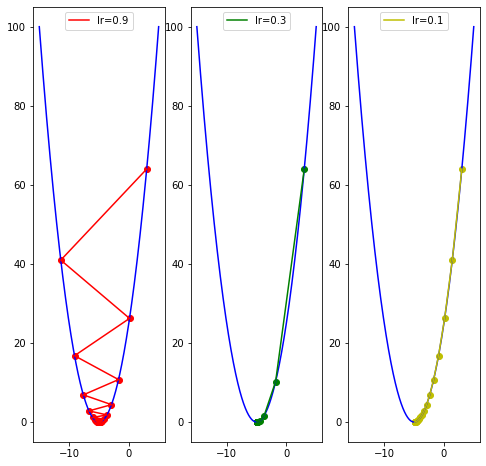

In [2]:
line_x = np.linspace(-15, 5, 1000)
line_y = func(line_x)

w_init = 3
epochs = 20

lr = [0.9, 0.3, 0.1]

color = ['r', 'g', 'y']

plt.figure(figsize=(8, 8))


for i in range(len(lr)):
    x = GD(w_init, dfunc, epochs, lr=lr[i])
    plt.subplot(1, len(lr), i+1)
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color[i], label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x), c=color[i])
    plt.legend()
plt.show()

# Result
學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了

如果讓能夠 lr 隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪

# 學習率衰減公式

$lr\_i=lr\_start \cdot \frac{1.0}{1.0\ +\ decay \ \times\  i}$


其中 $lr\_i$ 為第一迭代 i 時的學習率，$lr\_start$ 為原始學習率，decay 為一個介於 $[0.0, 1.0]$ 的小數。從公式上可看出：

decay 越小，學習率衰減地越慢，當 decay = 0 時，學習率保持不變

decay 越大，學習率衰減地越快，當 decay = 1 時，學習率衰減最快

In [3]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # 學習率衰減 
        lr_i = lr * 1.0 / (1.0 + decay * i)
        # v表示x要改变的幅度
        v = - dx * lr_i
        x += v
        xs[i+1] = x
    return xs

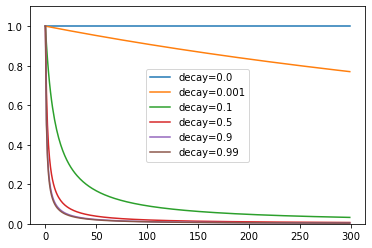

In [4]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)

plt.figure()

lr = 1.0
iterations = np.arange(300)
decay = [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]
for i in range(len(decay)):
    decay_lr = lr * (1.0 / (1.0 + decay[i] * iterations))
    plt.plot(iterations, decay_lr, label='decay={}'.format(decay[i]))

plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

# Result
衰減越大，學習率衰減地越快

衰減確實能夠對震盪起到減緩的作用

# Momentum (動量)
如何用"動量"來解決:

(1) 學習率較小時，收斂到極值的速度較慢。

(2) 學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，則把每次 w 的更新量 v 考慮為本次的梯度下降量 ($-dx \cdot lr$)

與上次 w 的更新量 v 乘上一個介於 $[0, 1]$ 的因子 momentum 的和


$w \leftarrow x- \alpha \cdot dw$ ($x$沿負梯度方向下降)

$v= \beta \times v - \alpha \cdot dw$

$w \leftarrow w+v$

($\beta$ 即 momentum 係數，通俗的理解上面式子就是，如果上一次的 momentum（即$\beta$）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程 

如果上一次的 momentum（即$\beta$）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程 


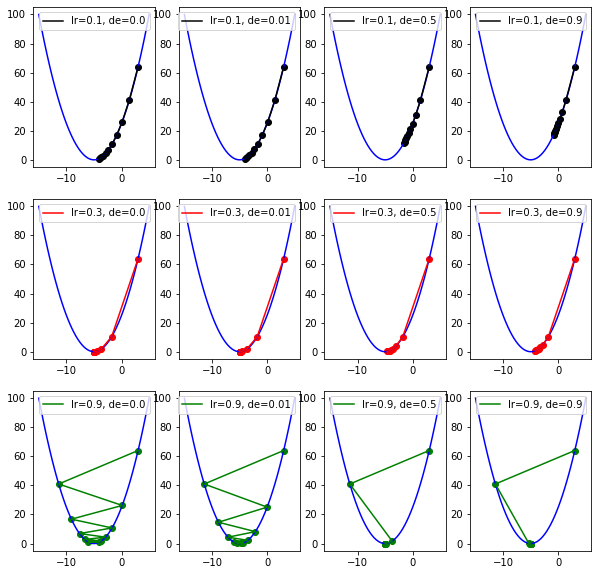

In [5]:
line_x = np.linspace(-15, 5, 100)
line_y = func(line_x)

w_init = 3
x = w_init
epochs = 10

lr = [0.1, 0.3, 0.9]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)

plt.figure(figsize=(10, 10))

for i in range(row):
     for j in range(col):
        x = GD_decay(w_init, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i])
        plt.legend(loc=0)
plt.show()